In [1]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


In [3]:
directory = '/home/luluvyd/corpus/aclImdb/sample/'
filename = '/home/luluvyd/corpus/aclImdb/test/example_pos/0_10.txt'
nlp = spacy.load('en_core_web_md')

In [7]:
def analyzePOS(doc):  
    '''
    parameter : doc is an article by a single author
    return : counter of POS tags
    '''
    counter = Counter([token.pos_ for token in doc])
    return counter

def rankCounter(counter): 
    '''
    parameter : counter of an article by a single author
    '''
    c = counter.most_common()
    return zip(*c)
    
def analyzeSentence(doc):
    '''
    parameter : doc is an article by a single author
    assume sentence length is measured by number of words
    return : counter of sentence lengths'''
    lengths = Counter([len(sentence) for sentence in doc.sents])
    for sentence in doc.sents: 
        print("SENTENCE : " + sentence.text)
    return lengths

def analyzeWordLength(doc): 
    '''parameter : doc is an article by a single author
    return : counter of word lengths
    '''
    counter = Counter([len(token.text) for token in doc])
    return counter

def analyzePunctuation(doc): 
    '''parameter:
    return : counter of punctuation symbols '''


In [17]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePOS(doc)
print(counter)

In [29]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeSentence(doc)
print(counter)

In [8]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeWordLength(doc)
print(counter)

Counter({2: 3, 1: 2, 3: 2, 4: 1, 5: 1, 7: 1, 8: 1})


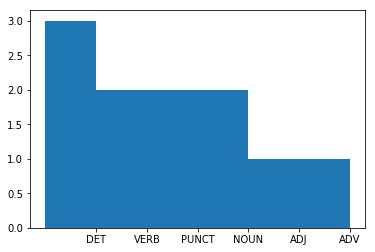

In [20]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

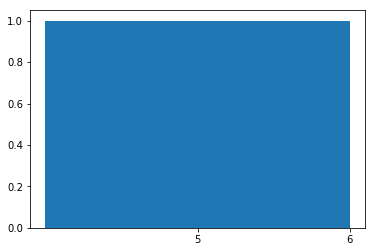

In [20]:

labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

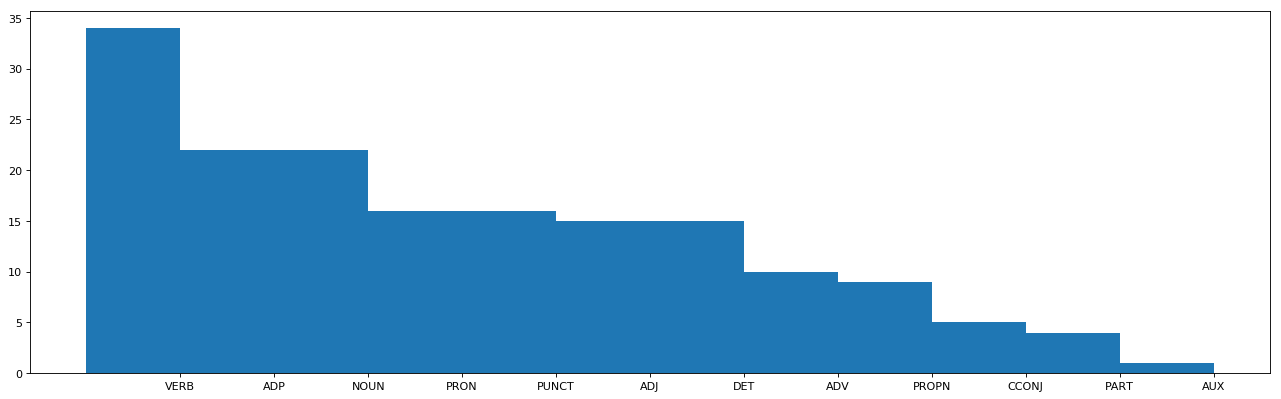

In [24]:
if __name__ == "__main__":  
    with open(filename, 'r') as f:
        text = f.read()
        nlp = spacy.load('en_core_web_md')
        doc = nlp(text)
        counter = analyzePOS(doc)
        
        plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

        labels, values = rankCounter(counter)
        indexes = np.arange(len(labels))
        width = 1
        plt.bar(indexes, values, width)
        plt.xticks(indexes + width * 0.5, labels)
        plt.show()
    f.close()
                


i : 0
i : 1
i : 2


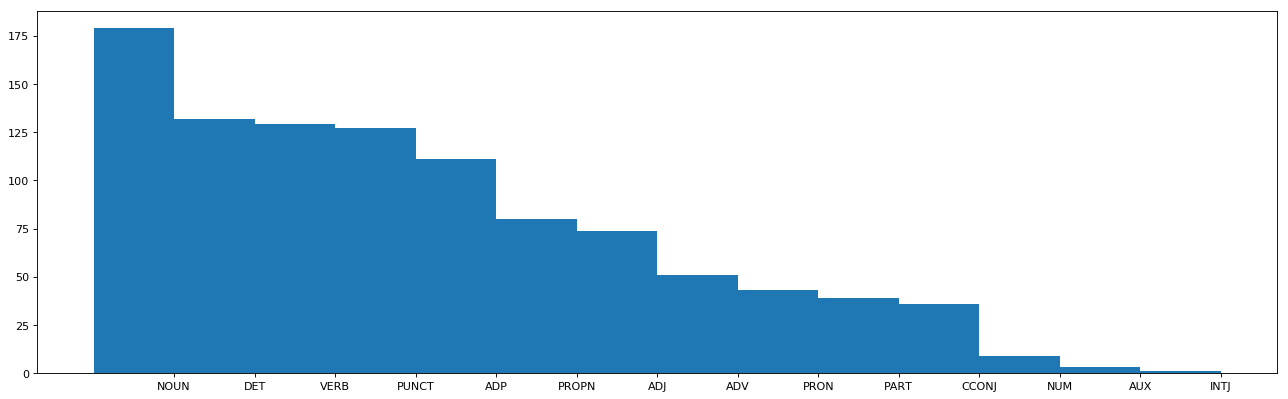

In [36]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        counter += analyzePOS(text) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
SENTENCE : At first glance, this film looks like the Keifer Sutherland series 24 for the big screen.
SENTENCE : With the focus on a plot to assassinate the President of the United States, a race against time, and plenty of Secret Service agents, the agency under the spotlight in The Sentinel.<br
SENTENCE : /><br
SENTENCE : />But
SENTENCE : wait, the protagonist turns out to be Michael Douglas' character Pete Garrison instead, a veteran Secret Service agent famed for taking the bullet for Reagan in 1981.
SENTENCE : The SS agents are specially trained to "take the bullet", which is what makes them special - who in the right mind will put themselves in the line of a bullet and a target?
SENTENCE : But Garrison gets implicated in the assassination plot, and has to run for his life while at the same time doing his bit of investigations into the plot.
SENTENCE : All this because of his failure in a polygraph test, due to his adulterous banging of the First Lady (Kim Basinger).
SENTENCE

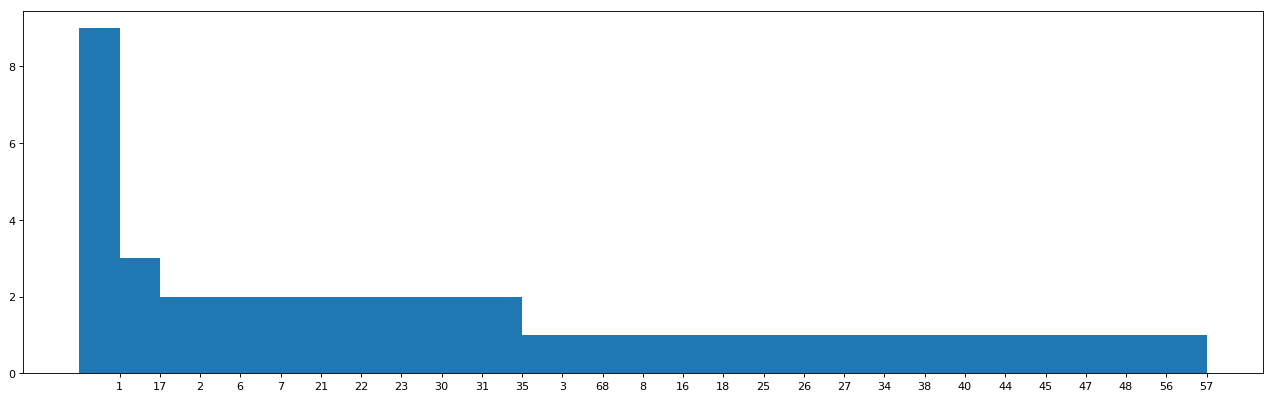

In [36]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

i : 0
i : 1
i : 2


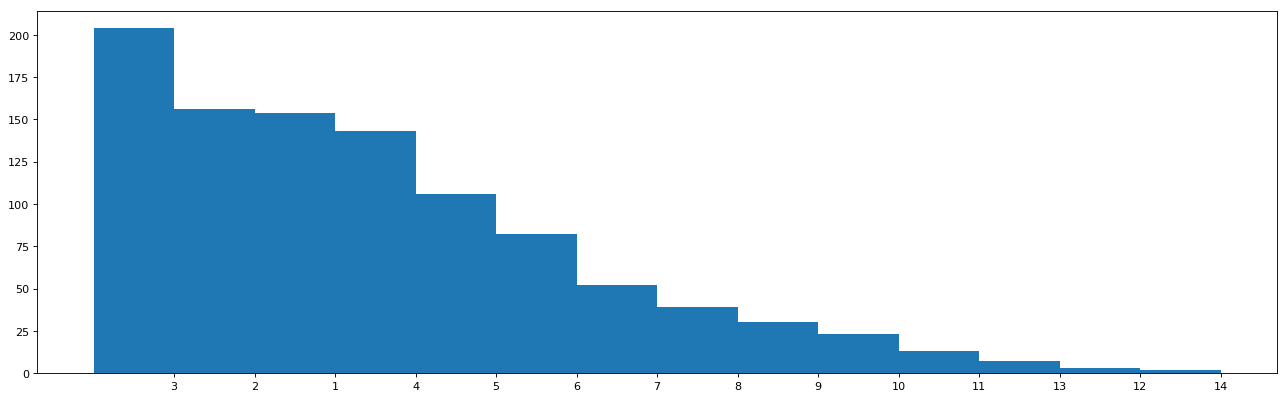

In [9]:
'''
Word lengths histogram 
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeWordLength(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()